# Mandal Motor’s Customer Segmentation Problem

## Context: 
### Mandal Motors Enters a New Market
Automobile company Mandal Motors has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, the head of sales Sylvester Sneekly deduced that the behavior of new market is similar to their existing market. In Mandal Motors’ existing market, Sneekly’s sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

### Mandal Motor’s Customer Segmentation Problem
The new manager Penelope Pitstop needs to identify which segment these new potential customers belong so as to maximize the impact of their marketing strategy. 


## Customer Segmentation
### Definition and Application
Companies utilize customer segmentation to maximize the value (revenue and/or profit) from each customer. These companies understand that there customers are not homogenous and that their marketing efforts would be more efficient if they target specific, smaller groups within their client bases with messages that those customers would find relevant and lead them to buy something. Customer segmentation then is the process of clustering customers into groups based on identifiable characteristics so as to market to each group effectively and appropriately.

## Data
### Overview
The data will consist of two data sets:
1. An 8068 customer sample from the most recent snap shot of Mandal Motors customer data.
2. A 2067  potential customer data set in the new market collected by Sneakly’ sales team

Both datasets includes customer information such as gender, marriage status, age, years of education, years of work experience, spending score, family size, anonymized category for the customer. Dataset A also includes the (target) Customer Segment of the customer.

Dataset A will be used to train the machine learning model to forecast the customer segmentation in Dataset B.


### Potential Obstacles
For Mandal Motors there is a potential complication in the fact they only have a snapshot of the most recent customer segmentation data they have in their old market. So already we know that the customer journey differs from data set A and data setB. There are no records of what the customer segmentation in Mandal Motors was over time or when entering previous new markets, or if customer segmentation changed as mandal motors was established. 
Further while the new and old markets are similar they are not identical. This implies that there are potential underlying differences between datasets A and B making and model trained on dataset A for datset B less accurate. Going forward it also implies that Mandal Motors will need to refresh this model with new data from the new market.

Envisioned Approach
Part 1 on Dataset A
1.	Overall Explore Data Analysis
    * determine size, number of null
2.	Univariate Explore Data Analysis
    * To understand variables range/size and identify how features might affect classification. 
    * Remove duplicate rows in dataset A
3.	Multivariate Explore data Analysis
    * To see what potential correlations within variable to watch for/ manipulate.
4.	Impute/Manipulate features. 
    * Includes pipeline of: label encoding, data scaling
    * data splitting (Train (60), Validate (25), Test (15) ) 
5.	Choose between 4 Classifiers [LGBM, Random Forest with impute, KNN with impute, ] to train model
    * Hyper tune parameters for each class with the  train data se
    * Evaluate on the validate data set
6.	Train chosen classifier 
    * Combine train+validate datasets into dataset ttrain. Train classifier on ttrain dataset
    * Evaluate on test data set to see likely accuracy
Part 2 on Dataset B
7.  Repeat feature imputation/manipulation that happened on dataset A onto dataset B
8.	Classify customers in dataset  B using  trained classifer from step 6


### Criteria for Success: 
We want to be to accurately classify customers 50% of the time [This matches Mandal Motors Accuracy rate]. 

## Importing Data:

In [1]:
#load python packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Data
#Get Path
import os
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

# Create the list of file names: filenames
sub_file = 'data'
file1 = 'train.csv'
file2 = 'test.csv'
file_name_path1 = os.path.join(basepath, sub_file, file1)
file_name_path2 = os.path.join(basepath, sub_file, file2)
train= pd.read_csv(file_name_path1)
test= pd.read_csv(file_name_path2)

C:\Users\Tiki\Documents\Sprinboard2\Capstone2
['.ipynb_checkpoints', 'archive', 'archive.zip', 'BI track_Proposal Auto Customer Segmentation.docx', 'Buisness Proposals.docx', 'data', 'EDA Capstone2.ipynb', 'eda v2 Capstone.ipynb', 'KDE Married Family Size.png', 'sample.png', '~$ track_Proposal Auto Customer Segmentation.docx']


## Data Wrangling

### Overview

In [3]:
print(train.shape) #print size
train.head() #display first five rows

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

Lot of the category variables have very few variables. This makes using them as dividers easiers

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


<AxesSubplot:ylabel='Segmentation'>

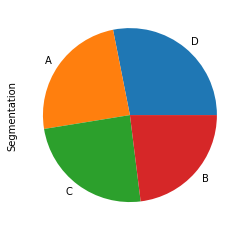

In [5]:
#review variable we are classifying
print(train['Segmentation'].value_counts())
train['Segmentation'].value_counts().plot.pie()

###  Data Cleaning- Duplicates

In [6]:
print('# of duplicate IDs in train data is',sum(train['ID'].value_counts()>1))

print('There are no direct duplicates to remove')

# of duplicate IDs in train data is 0
There are no direct duplicates to remove


In [7]:
#Count where everything is the same but ID
z= train.drop(columns=['ID'])
print('# of rows in train =' , z.shape[0])
print('# of rows in train when duplicate rows (ignoring ID) are droped ' , z.drop_duplicates().shape[0])
print('This tells us there are pottentially ',  z.shape[0] - z.drop_duplicates().shape[0], 'duplicate rows')

#How much does this not explain the data
z= train.drop(columns=['ID', 'Segmentation'])
print('# of rows in train when duplicate rows (ignoring ID, Segmentation) are droped ' , z.drop_duplicates().shape[0])
print('This tells us thereis a variable we are missing out in for at least',  z.shape[0] - z.drop_duplicates().shape[0], 'rows')


# of rows in train = 8068
# of rows in train when duplicate rows (ignoring ID) are droped  7651
This tells us there are pottentially  417 duplicate rows
# of rows in train when duplicate rows (ignoring ID, Segmentation) are droped  7334
This tells us thereis a variable we are missing out in for at least 734 rows


### Data Cleaning- Reducing Number of Nulls

In [8]:
#Print the columns names of the entire dataframe
print(train.columns)
# Review the column names, null value counts and data types of your data frame.
train.info()

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
# how many null values 
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

<AxesSubplot:>

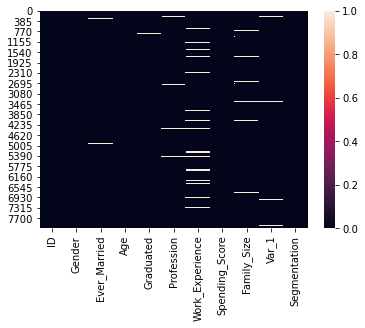

In [10]:
#Visualization to check for missing values
sns.heatmap(train.isna())

Not much overlap on null values in the row so getting rid of all rows with null is not that useful. That said it does mean that if there are more than one null in the row that row is an outlier.

Further most nulls as we can tell are in work experience

In [11]:
train= train.dropna(thresh=8)
train=train.dropna(subset=[n for n in train if n != 'Work_Experience'], thresh=9)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8011 non-null   int64  
 1   Gender           8011 non-null   object 
 2   Ever_Married     7889 non-null   object 
 3   Age              8011 non-null   int64  
 4   Graduated        7950 non-null   object 
 5   Profession       7910 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   8011 non-null   object 
 8   Family_Size      7718 non-null   float64
 9   Var_1            7953 non-null   object 
 10  Segmentation     8011 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 751.0+ KB


Fill category variables for large values with 'Missing'. Exception Var_1 which the company themselves created. As there are Categories 1 to 6 we make this 'Cat_0'

In [12]:
print(train['Var_1'].value_counts())
train['Ever_Married'] = train['Ever_Married'].fillna('Missing')
train['Graduated'] = train['Graduated'].fillna('Missing')
train['Profession'] = train['Profession'].fillna('Missing')
train['Var_1'] = train['Var_1'].fillna('Cat_0')
train.info()

Cat_6    5226
Cat_4    1079
Cat_3     810
Cat_2     420
Cat_7     201
Cat_1     132
Cat_5      85
Name: Var_1, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8011 non-null   int64  
 1   Gender           8011 non-null   object 
 2   Ever_Married     8011 non-null   object 
 3   Age              8011 non-null   int64  
 4   Graduated        8011 non-null   object 
 5   Profession       8011 non-null   object 
 6   Work_Experience  7198 non-null   float64
 7   Spending_Score   8011 non-null   object 
 8   Family_Size      7718 non-null   float64
 9   Var_1            8011 non-null   object 
 10  Segmentation     8011 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 751.0+ KB


I will use an iterave imputater on my machine learning classification model for the numerical features that have missing aka "work esperience" and "size"

In [13]:
#finding categorical data
print(train.dtypes)
categorical_features = train.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
total categorical_features 7


Potentially there are 417 duplicate rows where they randomly got assigned another ID. However we cannot garantee that. 

We also know there is a potential variable missing because there are customers who have all the same features as another customer (barring ID) except for their segmentsegment. 

## EDA 

### Univariate EDA Numerical-  (Also includes outlier data cleaning)

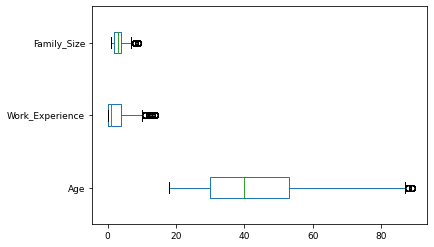

In [14]:
boxplot = train.drop(columns=['ID']).boxplot(grid=False, vert=False,fontsize=9)

In [15]:
train.describe(percentiles= [0.05, .25, .5, .75, 0.95])

,ID,Age,Work_Experience,Family_Size
count,8011.000000,8011.000000,7198.000000,7718.000000
mean,463482.863188,43.468730,2.638233,2.849832
std,2593.678626,16.699252,3.406178,1.531618
min,458982.000000,18.000000,0.000000,1.000000
5%,459438.500000,21.000000,0.000000,1.000000
25%,461250.500000,30.000000,0.000000,2.000000
50%,463475.000000,40.000000,1.000000,3.000000
75%,465743.500000,53.000000,4.000000,4.000000
95%,467522.500000,77.000000,9.000000,6.000000
max,467974.000000,89.000000,14.000000,9.000000


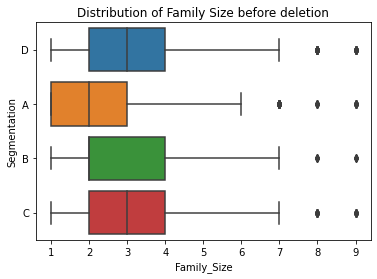

In [16]:
#Investigate Family_Size using boxplot
sns.boxplot(x='Family_Size', y='Segmentation', data=train)
plt.title("Distribution of Family Size before deletion")
plt.show()
#Outliers Ages 8 and 9

In [17]:
#train.groupby('Family_Size').Segmentation.value_counts()
table = pd.pivot_table(train[['Family_Size', 'Segmentation', 'ID']], index=['Family_Size'], columns=['Segmentation'], aggfunc='count')
table

ID               
Segmentation    A    B    C    D
Family_Size                     
1.0           560  362  140  388
2.0           620  620  773  373
3.0           316  331  391  459
4.0           218  299  390  466
5.0            81  136  148  245
6.0            35   39   43   95
7.0            26   14   14   42
8.0             7    5   13   25
9.0            11    4   11   18

#### Outliers Family size
Family Size skew left with over 85% of customers having a family size of 4 or less and only
At Family Size 7 and greater there are less than 3% of the people. That said this a skew not really outliers so I feel no real need to eliminate them.

Text(0.5, 1.0, 'Distribution of Age before deletion')

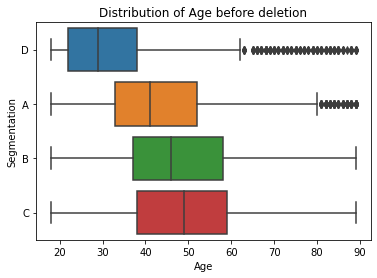

In [18]:
#Investigate Age using boxplot
sns.boxplot(x='Age', y='Segmentation', data=train)
plt.title("Distribution of Age before deletion")


#### Outliers Age
No outliers found. If we look at segment B and C we notice that the entire Age is within the box and whisker's plot. 

Other notes: Age does skew left though for Segment D. Though the skew is not as grand for A they average age is younger for segment A customers than B or C. 

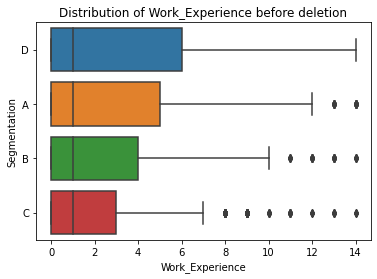

In [19]:
#Investigate Age using boxplot
sns.boxplot(x='Work_Experience', y='Segmentation', data=train)
plt.title("Distribution of Work_Experience before deletion")
plt.show()
#Outliers:NA -Looking at outliers  in Work_Experience from a segmentation point of view we see no outliers in segment D

#### Outliers Work Experience
No outliers found. If we look at segment D we see that the entire work experience range is in the box and whiskers.

#### Notes EDA Univariate Numeric
Segment D skews Young and with large amount of work experience.
Segment A likely has a family size 3 or less, are relatively young and havemore work experience
Segments B and C customers skew older and usually have less work experience than segments D and A

### EDA- Univariate Categorical

In [20]:
# groupby to create another dataframe
def quick_bargraph(q, df):
    """
    Put in variable name and dataset
    ___
    Returns:  count graph, and percent graph
    """
    p= 'Segmentation'
    df_pcts = (df.groupby(q).Segmentation.value_counts(normalize=True).mul(100)
              .unstack().stack(dropna=False).fillna(0)
              .rename('Percent').reset_index())
    df=df.sort_values(by=[q,p])
    df_pcts=df_pcts.sort_values(by=[q,p])
    # create my bar plot
    fig, axs = plt.subplots(2, 2, figsize=(14,5), sharex=True)
    fig.suptitle('{} with regard to {}'.format(p,q), fontsize=16, y=1 , x= 0.45)

    ax1 = plt.subplot(121)

    sns.countplot(x=q ,hue=p, data=df,  hue_order = ['A', 'B','C','D'])
    plt.legend([],[], frameon=False)
    plt.title("As Number of Individiuals")

    # label the bars
    for ps in ax1.patches:
        ax1.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), 
            fontsize=10, color='black', ha='center', va='bottom')

    ax2 = plt.subplot(122)
    sns.barplot(x=q, hue=p,  y="Percent", hue_order = ['A', 'B','C','D'] , data=df_pcts, ci = None)
    plt.title("As a Percentage of Inidivduals within {}".format(q))
    yt= 'Percentage (%)'

    # label the bars
    for p in ax2.patches:
        ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d%%' % round(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
    plt.legend(bbox_to_anchor=(1.05, 1), title='Segmentation', loc=2, borderaxespad=0.)

    plt.show()


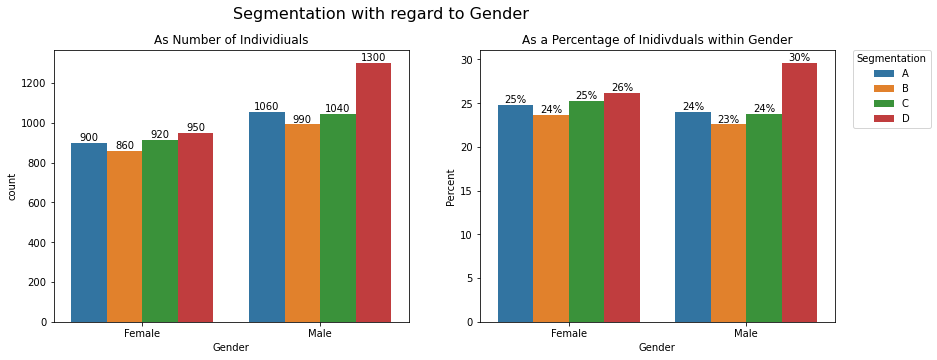

In [21]:
quick_bargraph('Gender', train)

#### Gender Segment 
Overall: More Men clients then female
Men: More likely to be Segment D
Segment D: More likey to be Men

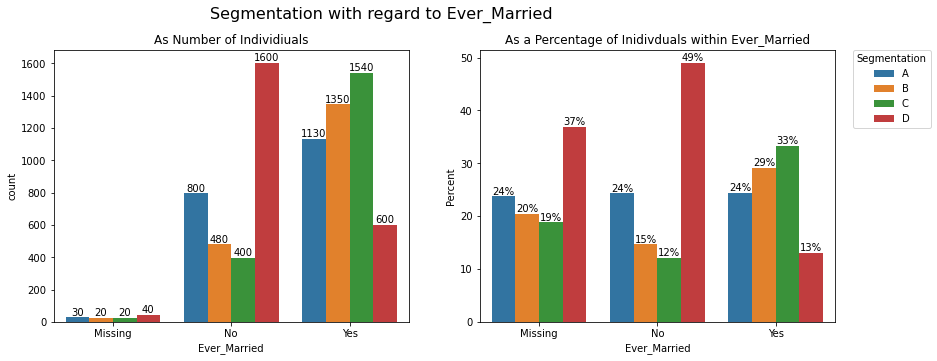

In [22]:
quick_bargraph('Ever_Married', train)

#### Ever Married
Segment D is usually Single: We can see from the above graph that if you are single you have a 50% likelood of being D segmentation. Once you get married that drops to around 13%

Segments B and C: Over a 75% likelyhood of being Married to being single

Segment A: Skews to being Married t

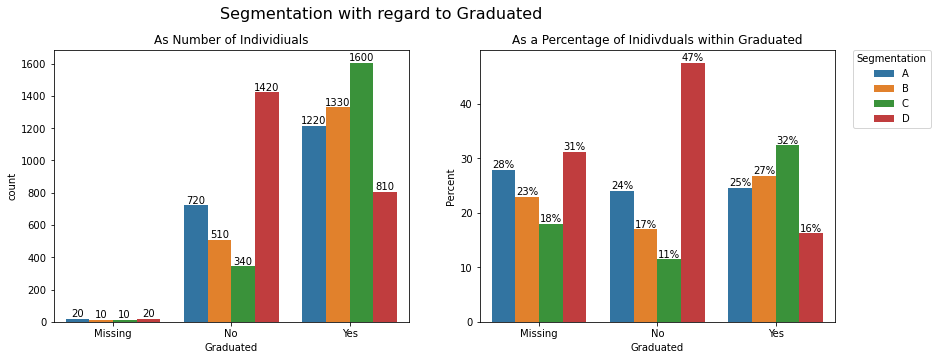

In [23]:
quick_bargraph('Graduated', train)

One key note here is that not graduated and Single seem to act in a simalar matter. We should see if they compound each other's effects

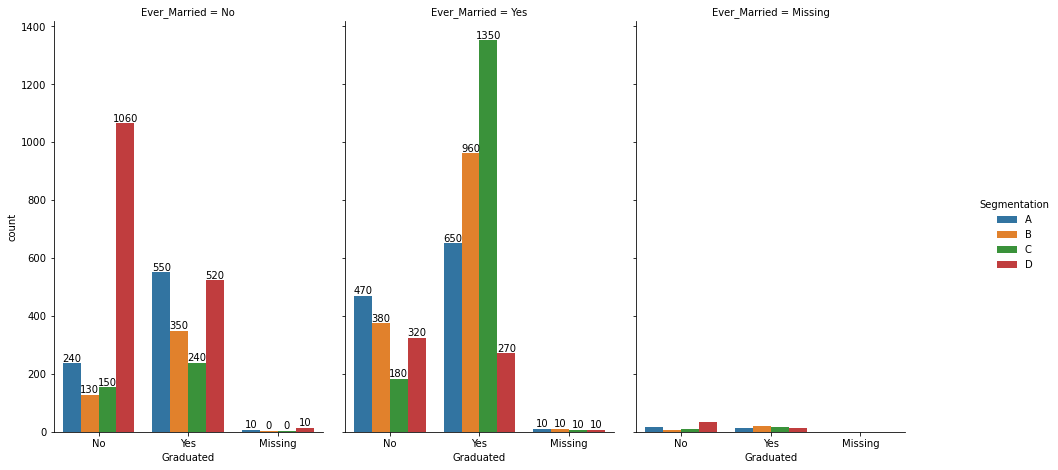

In [24]:
g=sns.catplot(x="Graduated", hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="count", height=4, aspect=.7)

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
for i in np.arange(2):
    ax = g.facet_axis(0, i)
    # iterate through the axes containers
    for ps in ax.patches:
        ax.text(ps.get_x() + ps.get_width()/2., ps.get_height(), '%d' % round(ps.get_height(), -1), fontsize=10,
                color='black', ha='center', va='bottom')


##### Single and Grduated
Interesting! 

If you are segment C you have a 70% likelihood of being both married and Graduated. While if you are segment D you have a 50% likelihood of being single and not graduated. 

If you are married and you have graduated you are most likely to be in segment C followed B then A. If you are married and not graduated you are most likely segment A

If you are single and you haven't graduated you have a 2 of 3 chance of beind segment D. However if you are single and you have single and gruduated you have an around an 1 of 3 chance of being A or D

Does this have an age Dynamic?

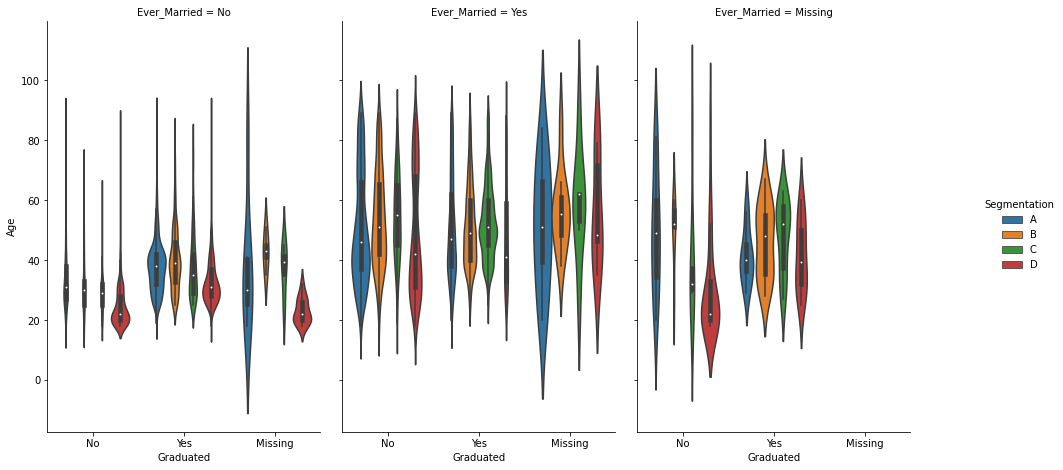

In [25]:
g=sns.catplot(x="Graduated", y='Age', hue="Segmentation", col="Ever_Married", data=train, hue_order = ['A', 'B','C','D'],
                kind="violin", height=4, aspect=.7, scale='count')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)

##### Single and Graduated (cont)
It does. D does skew young if you are not married. Orinally we said you had graduated and are not married you have an appromimate equal likelihood of being A or C. Now we can clarify that now . If you graduated, single and under 30 yrs old you are more likely to be in Segment D.  If you graduated, single and over 30 you are more likely to be segment D 

##### Spending Score

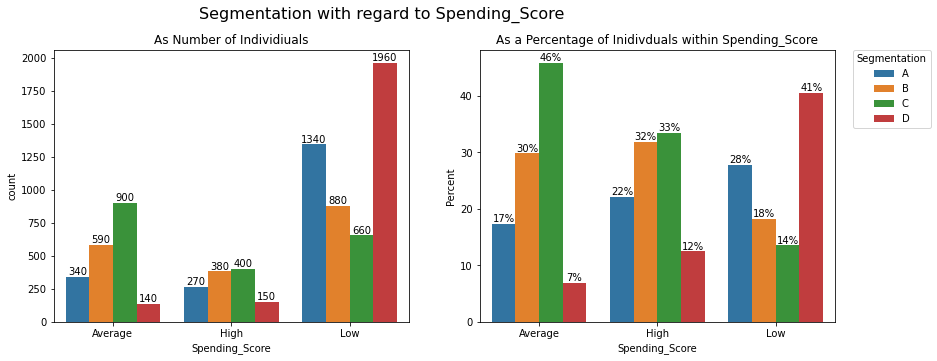

In [26]:
quick_bargraph('Spending_Score', train)

##### Spending Score
Low spending score means likely D followed by A.  Average score means 50% likelihood C. This make

### Bivariate EDA

<AxesSubplot:>

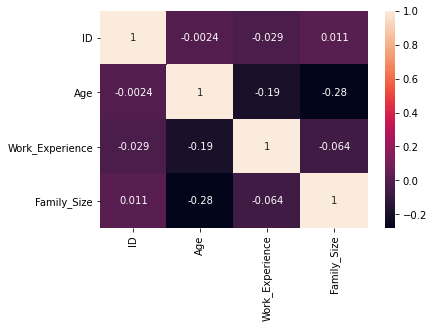

In [27]:
sns.heatmap(train.corr(),annot=True) 
#No really high correlation which is surpising since Age should correlate with work experience

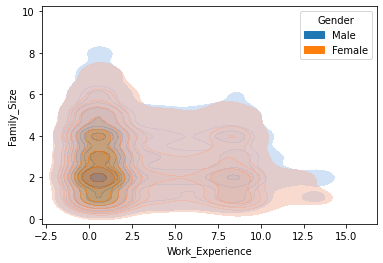

In [28]:
#kde plot Work Experience            
ax= sns.kdeplot(x="Work_Experience", y="Family_Size",data=train, fill= True, hue= 'Gender', alpha=0.5 )
#We see  a huge group ing at family size 3 and 0 to 1 years of work experience. This makes sense

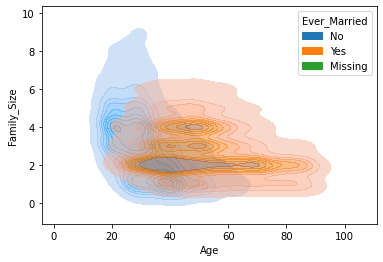

In [29]:
#kde plot            
ax= sns.kdeplot(x="Age", y="Family_Size", hue='Ever_Married', data=train, alpha=0.5, fill= True)

Married and Single act differently with regard to Age and family size. 
If you are single:
* there is a cluster at 1 person family size centered at Age 40. 
* There is a cluster for 2 to 4 person family size centered around ages 20 to 30. 

If you are Married:
* there is a cluster at 2 person family size centered at ages 25 to 40. 
* There is a cluster for 3 person family size ages 30 to 50. 
* There is a cluster for 4 person family size ages 40 to 50. 

This is just demographic info though

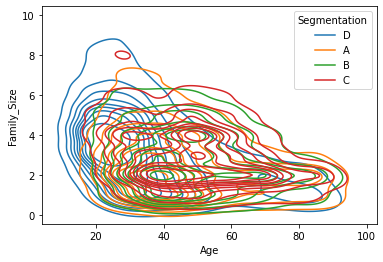

In [30]:
#kde plot            
ax= sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=train, )
#There are clusters with Age and family size but we get a whole lot of nothing when graph them together let's seperate it out

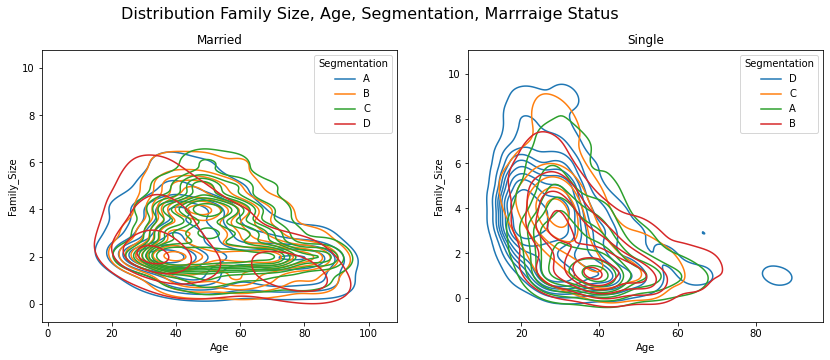

In [31]:
z= train
z['MG']= np.where(z['Ever_Married']=='Yes', np.where(z['Graduated']=='Yes', 'Married Graduate', 'Married Non_Graduate'), np.where(z['Graduated']=='Yes', 'Single Graduate', 'Single Non_Graduate'))

fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Family Size, Age, Segmentation, Marrraige Status', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[z['Ever_Married']=='Yes'])
plt.title('Married')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[z['Ever_Married']=='No'])
plt.title('Single')
plt.savefig("sample.png")
 #There does appear to be some clear groupings here beyong just single and married.  We will remember this when aking new features

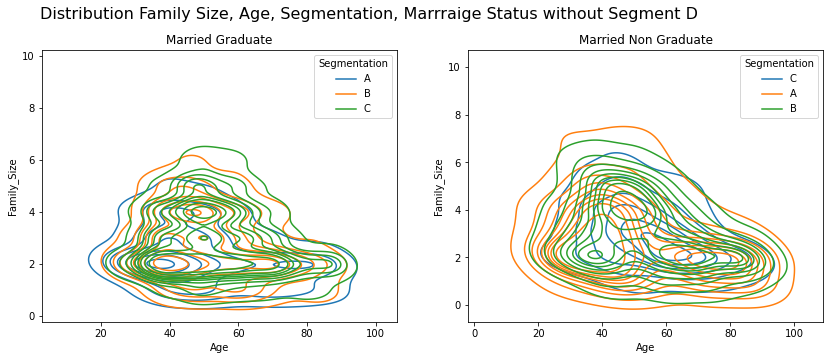

In [32]:
z= train
z['MG']= np.where(z['Ever_Married']=='Yes', np.where(z['Graduated']=='Yes', 'Married Graduate', 'Married Non_Graduate'), np.where(z['Graduated']=='Yes', 'Single Graduate', 'Single Non_Graduate'))

fig, axs = plt.subplots(2, 2, figsize=(14,5)) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Family Size, Age, Segmentation, Marrraige Status without Segment D', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[(z['MG']=='Married Graduate') & (z['Segmentation']!='D') ])
plt.title('Married Graduate')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Family_Size", hue='Segmentation', data=z[(z['MG']=='Married Non_Graduate') & (z['Segmentation']!='D')])
plt.title('Married Non Graduate')

plt.savefig("KDE Married Family Size.png")
 #There does appear to be some clear groupings here again this should be put forth

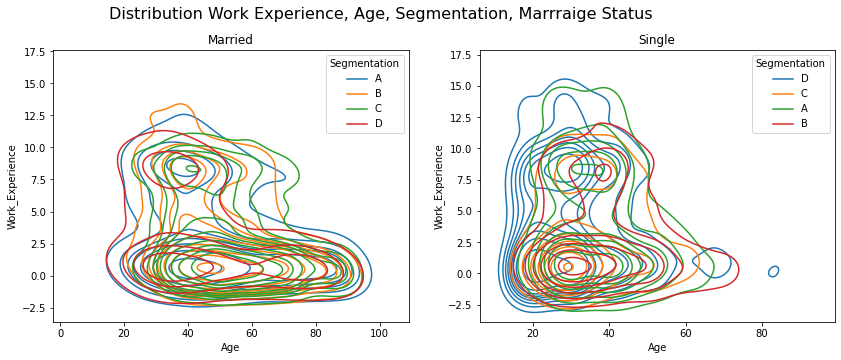

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(14,5), sharey=True) #Create two sub plots sharing x and y axis
fig.suptitle('Distribution Work Experience, Age, Segmentation, Marrraige Status', fontsize=16, y=1 , x= 0.45)
from scipy.stats import kde
ax1 = plt.subplot(121)
sns.kdeplot(x="Age", y="Work_Experience", hue='Segmentation', data=z[z['Ever_Married']=='Yes'])
plt.title('Married')

ax2 = plt.subplot(122)
# Plot a simple distribution of the desired columns
sns.kdeplot(x="Age", y="Work_Experience", hue='Segmentation', data=z[z['Ever_Married']=='No'])
plt.title('Single')
plt.savefig("sample.png")

Errr... We don't get much from looking at the segments with workplace yrs and age even though we know there should be. Does it get clearer if we dig deeper?

Nope. Well we are done with then onto age and family size

#### Additional Data Wrangling

Convert Spending Score to Ordinal

In [34]:
train['Spending_Score'] = train['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
train['Spending_Score']=train['Spending_Score'].astype('int')
train= train.drop(columns= ['MG'])
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,1,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,2,6.0,Cat_6,A


## Pre-Processing

In [46]:
#Train & Test Split
from sklearn.model_selection import train_test_split

label_col = 'Segmentation'
df_train1, df_eval1 = train_test_split(train, test_size=0.25, random_state=101, shuffle=True, stratify=train[label_col])

feature_cols = df_train1.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Segmentation')

### Chosing Scaler Standardization

##### Standizing Data
* We have a few methods of standardization to choose from: Robust, Minmax, Normalize and Standardize
* We use Robust if we want to minimize impact of outliers
* We use Normalize if we think the distrubtion within a variable needs to be normalized and/or has a normal distribution
* We use Standardize when we think most of the variables have similar distribution and no/few dummy variables

##### Choosing Min Max Scaler
* The data for price is and age are not a normal destribution we eliminate normalize scaler
* No large outliers as noted earlier so no need for Robust Scaler
* As we have dummy variables we can eliminate standard scaler 
* That leaves us with Min Max scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


#Label Encode Target Feature
le = LabelEncoder()
df_train1['Segmentation']= le.fit_transform(df_train1['Segmentation'])
df_eval1['Segmentation'] = le.transform(df_eval1['Segmentation'])

#Scale and impute for numeric features
#We use median imputer because there are outliers for Age
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])
numerical_features = df_train1.select_dtypes(include=['int64','int32','float64', 'float']).columns.tolist()

# items to be removed
unwanted_num = {'ID', 'Segmentation', 'Spending_Score'}
numerical_features = [ele for ele in numerical_features if ele not in unwanted_num]
print(numerical_features)

#Encode Categorical Features
categorical_features = df_train1.select_dtypes(exclude=['int64','int32','float64', 'float']).columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
print(categorical_features)

ct = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
df_train= ct.fit_transform(df_train1)
df_eval = ct.transform(df_eval1)

['Age', 'Work_Experience', 'Family_Size']
['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_log_error, mean_squared_error, roc_auc_score
from sklearn.metrics import accuracy_score, log_loss